In [1]:
import pandas as pd
d = pd.read_csv("bmi.csv")
d

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [2]:
# Converting male to 0 and female to 1
d['Gender'] = d['Gender'].map({'Male':0, 'Female':1})
d

,Gender,Height,Weight,Index
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3
...,...,...,...,...
495,1,150,153,5
496,1,184,121,4
497,1,141,136,5
498,0,150,95,5


In [3]:
x = d.drop('Index', axis=1)
x

,Gender,Height,Weight
0,0,174,96
1,0,189,87
2,1,185,110
3,1,195,104
4,0,149,61
...,...,...,...
495,1,150,153
496,1,184,121
497,1,141,136
498,0,150,95


In [4]:
y = d['Index']
y

0      4
1      2
2      4
3      3
4      3
      ..
495    5
496    4
497    5
498    5
499    5
Name: Index, Length: 500, dtype: int64

In [5]:
x.shape

(500, 3)

In [6]:
y.shape

(500,)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)
x_train.shape
y_train.shape

(350,)

In [8]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
# To train the dataset
log_model.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
pred = log_model.predict(x_test)
pred

array([5, 4, 5, 2, 3, 3, 1, 4, 5, 4, 5, 3, 5, 3, 5, 2, 5, 5, 4, 5, 4, 5,
       4, 5, 2, 4, 3, 4, 5, 2, 5, 4, 4, 5, 4, 5, 0, 2, 5, 4, 3, 5, 4, 5,
       5, 5, 4, 2, 1, 3, 5, 5, 5, 4, 2, 2, 2, 5, 4, 5, 3, 3, 5, 5, 3, 5,
       4, 4, 4, 5, 5, 4, 5, 5, 1, 4, 3, 3, 5, 2, 2, 2, 5, 3, 5, 5, 5, 5,
       5, 2, 3, 5, 2, 4, 4, 0, 4, 5, 5, 5, 2, 4, 4, 5, 2, 3, 5, 5, 1, 1,
       5, 4, 5, 3, 5, 5, 5, 2, 4, 4, 5, 4, 4, 5, 4, 5, 5, 1, 4, 2, 5, 1,
       5, 4, 3, 5, 5, 5, 3, 5, 5, 4, 3, 5, 1, 5, 2, 4, 5, 5], dtype=int64)

In [10]:
(d['Gender']==0).sum()
(d['Gender']==1).sum()

255

In [11]:
data = pd.get_dummies(d, columns=["Gender"], dtype=int, drop_first=True)
data

,Height,Weight,Index,Gender_1
0,174,96,4,0
1,189,87,2,0
2,185,110,4,1
3,195,104,3,1
4,149,61,3,0
...,...,...,...,...
495,150,153,5,1
496,184,121,4,1
497,141,136,5,1
498,150,95,5,0


In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7666666666666667

In [13]:
# Linear Regression
# Data: 

# X(Week)                                      Y(Sales in Thousand)
# --------------------------------------------------------------------
#     1                                                1.2
#     2                                                1.8
#     3                                                2.5
#     4                                                3.2
#     5                                                3.8

# Linear regression formula --> y = a0+a1*x

# a1--> ((meanof(x*y)) - (meanof(x)*meanof(y)))/meanof(x^2) - (meanof(x)^2)
# a0 = meanof(y)-a1*meanof(x) 
#                 x         y                x^2         x*y
#     ------------------------------------------------------------------
#                 1        1.2                1          1.2
                
#                 2        1.8                4          3.6
                
#                 3        2.5                9          7.5
                  
#                 4        3.2                16         12.8
                
#                 5        3.8                25         9
#      ------------------------------------------------------------------
# Sum:            15      12.5                55         44.4
# Average:        3        2.5                11         8.88

# a1 = 0.66
# a0 = 0.54

# The sales of 3rd week
# y = a0+(a1*x) --> 0.54+(0.66*3) --> 2.52

# The sales of 7th week
# y = 0.54+(0.66*7) --> 5.16

In [14]:
# Project-1
df = pd.read_csv("Linear_regr_Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [15]:
df.shape

(30, 3)

In [16]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [17]:
df.isna().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [18]:
x = df[['YearsExperience']]
x
y = df[['Salary']]
y

,Salary
0,39344.0
1,46206.0
2,37732.0
3,43526.0
4,39892.0
5,56643.0
6,60151.0
7,54446.0
8,64446.0
9,57190.0


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [21]:
model.fit(x_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(x_test)
y_pred

array([[ 91101.58255782],
       [109298.20888234],
       [ 56623.76425873],
       [ 82482.12798305],
       [ 40342.57228416],
       [117917.66345711],
       [116959.94628213],
       [ 74820.39058325],
       [112171.36040726]])

In [23]:
import numpy as np
y_test

,Salary
20,91739.0
24,109432.0
7,54446.0
18,81364.0
2,37732.0
27,112636.0
26,116970.0
16,66030.0
25,105583.0


In [24]:
inputdata = [[14.5]]
prediction = model.predict(inputdata)
prediction

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[163888.08785589]])

In [25]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

17978409.497344103

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


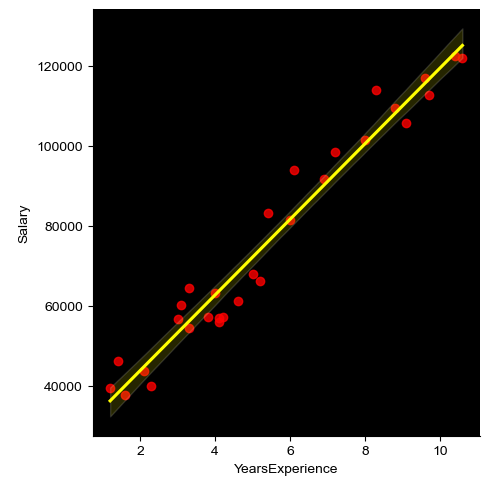

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='YearsExperience', y='Salary', data=df, line_kws={"color":"yellow"}, scatter_kws={"color":"red"})
sns.set_style("darkgrid")
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')
ax = plt.gca().set_facecolor("black")

In [27]:
# Project-2
df = pd.read_csv("LR_Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [28]:
df.shape

(10000, 6)

In [29]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [31]:
# To check duplicate values
duplicate_rows = df.duplicated()
duplicate_rows.sum()
print("Before dropping duplicates", df.shape)
df.drop_duplicates(inplace = True)
print("After dropping duplicates", df.shape)

Before dropping duplicates (10000, 6)
After dropping duplicates (9873, 6)


In [32]:
# Based on index value try to check the performance
response = df["Performance Index"]
response.dtype

dtype('float64')

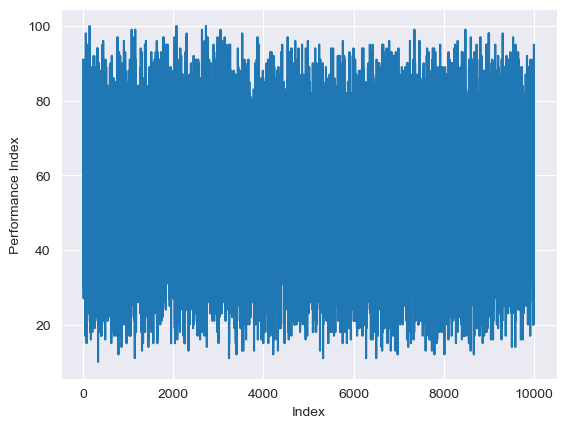

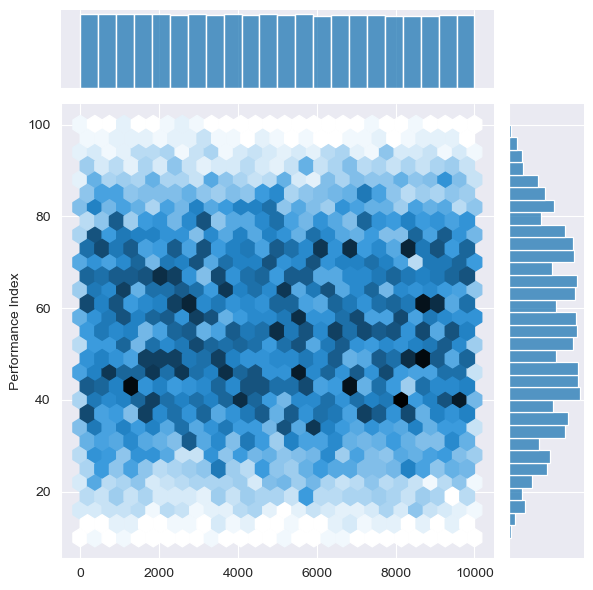

In [33]:
plt.plot(response.index, response)
plt.xlabel("Index")
plt.ylabel("Performance Index")
sns.jointplot(x=response.index,y="Performance Index", data=df, kind="hex")

<Axes: >

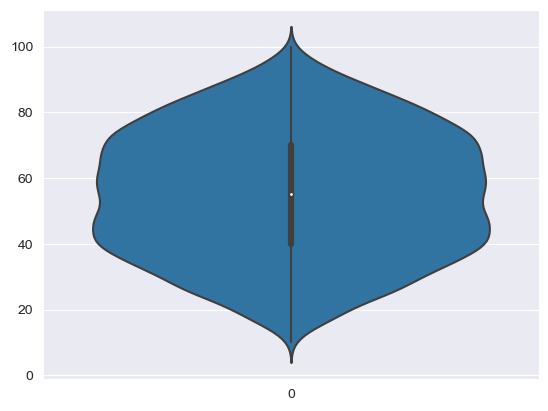

In [34]:
sns.violinplot(response)

In [35]:
(df['Performance Index']==min(response)).sum()
(df['Performance Index']==max(response)).sum()

3

In [36]:
(df["Hours Studied"].max())
(df["Hours Studied"].min())
(df["Hours Studied"].sum())
df["Hours Studied"].value_counts()
df["Hours Studied"].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9], dtype=int64)

<Axes: xlabel='Hours Studied', ylabel='Count'>

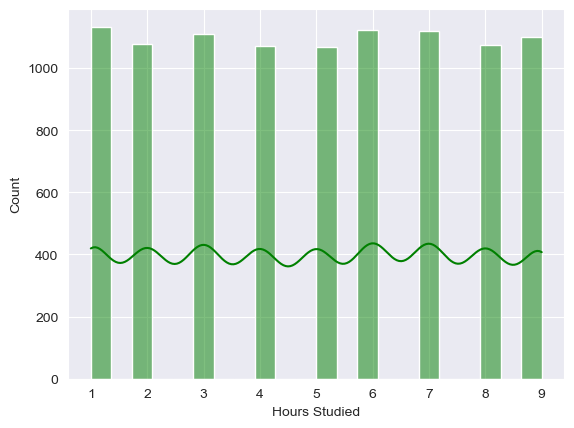

In [39]:
# To know how many students studied in each hours
sns.histplot(df["Hours Studied"], kde=True, color="green")

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

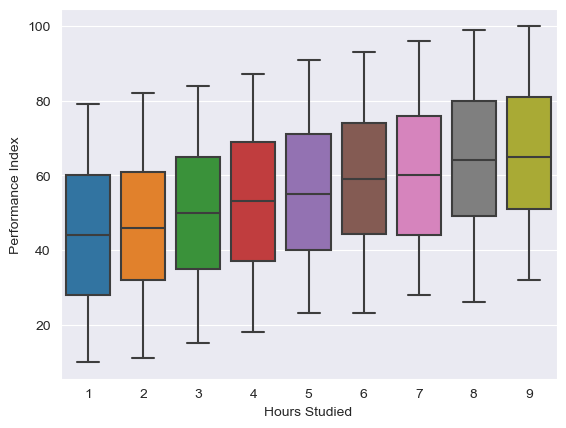

In [40]:
sns.boxplot(x=df["Hours Studied"], y=df["Performance Index"])

<Axes: xlabel='Extracurricular Activities', ylabel='count'>

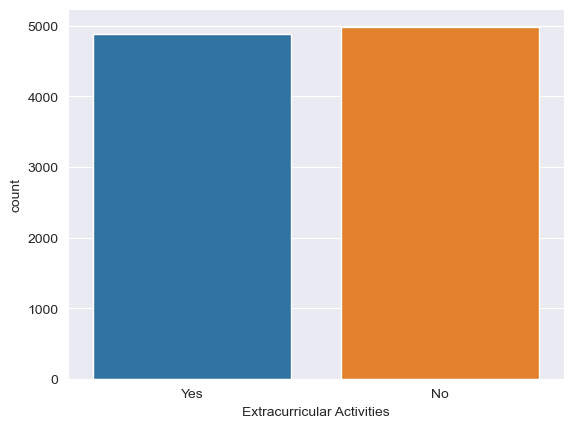

In [41]:
sns.countplot(x="Extracurricular Activities", data=df)

In [42]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [43]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes':1, 'No':0})
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [44]:
x = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = df[['Performance Index']]

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [46]:
# Prediction
y_pred = model.predict(x_test)
y_pred

array([[31.73833038],
       [64.02696941],
       [59.58675416],
       ...,
       [61.72624559],
       [45.61901033],
       [65.47859095]])

In [47]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, np.round(y_pred))
acc

0.20729237002025658

In [48]:
inputdata = [[14.5, 13, 16, 20, 17]]
pred = model.predict(inputdata)
pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[43.23442314]])

In [49]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

4.218166715267655

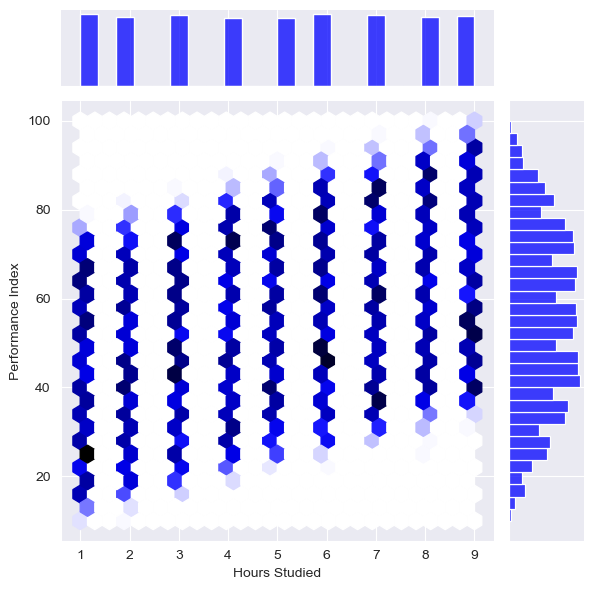

In [50]:
sns.jointplot(x="Hours Studied", y="Performance Index", data=df, kind="hex", color="blue")

In [51]:
# Instead of Linear Regression
from sklearn.linear_model import Ridge

In [52]:
clf = Ridge()

In [53]:
clf.fit(x_train, y_train)

Ridge()

In [54]:
y_pred = clf.predict(x_test)
y_pred

array([[31.73864699],
       [64.02668957],
       [59.58709948],
       ...,
       [61.72633893],
       [45.61936081],
       [65.4789566 ]])

In [55]:
clf.score(x_test, y_test)

0.9886367029756433